## Packages

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
import math
import re
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import ReferenceArchitecture as ra
import spacy
import en_core_web_lg
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/domitillechambon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/domitillechambon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Task B

In [2]:
raw = pd.read_csv("Beer Reviews.csv")

In [3]:
def punctuation_extermination(s):
    o = str.maketrans('', '', string.punctuation)
    return str(s).translate(o)

raw['Review'] = raw['Review'].apply(punctuation_extermination)

raw.head()

,Unnamed: 0,Beer_Name,Rating,Review
0,0,Kentucky Brunch Brand Stout,None,None
1,0,Kentucky Brunch Brand Stout,5,I didnt think i was going to give it a perfect...
2,0,Kentucky Brunch Brand Stout,3.79,So I just read a review that called the legend...
3,0,Kentucky Brunch Brand Stout,4.64,2021 vintage bottle 79\n\nHoly Fucking Shit KB...
4,0,Kentucky Brunch Brand Stout,4.27,Celebrating my buddy Rug with his 1000th beer ...


In [4]:
raw_corpus = ""
for l in raw['Review']:
    l = str(l).lower()
    raw_corpus += l

raw_corpus[:500]

'nonei didnt think i was going to give it a perfect score but its looks smells tastes a 5 however the mouth feel is not by any means equal to look smell and taste pardon me i have to sit down mouth feel is well 11 yeh like twice as good as anything ive ever had before it grabs you by the face with both hands and says what was that that just went down my throat it tasted familiar like real pure butter on real belgiumchocolate buttermilk pancakes with fresh highbush blueberries real vermont maple s'

In [5]:
raw_corpus = raw_corpus.split()
corpus_without_stop = [word for word in raw_corpus if word not in stopwords.words("english")]
corpus_without_stop[:500]

['nonei',
 'didnt',
 'think',
 'going',
 'give',
 'perfect',
 'score',
 'looks',
 'smells',
 'tastes',
 '5',
 'however',
 'mouth',
 'feel',
 'means',
 'equal',
 'look',
 'smell',
 'taste',
 'pardon',
 'sit',
 'mouth',
 'feel',
 'well',
 '11',
 'yeh',
 'like',
 'twice',
 'good',
 'anything',
 'ive',
 'ever',
 'grabs',
 'face',
 'hands',
 'says',
 'went',
 'throat',
 'tasted',
 'familiar',
 'like',
 'real',
 'pure',
 'butter',
 'real',
 'belgiumchocolate',
 'buttermilk',
 'pancakes',
 'fresh',
 'highbush',
 'blueberries',
 'real',
 'vermont',
 'maple',
 'syrup',
 'madagascar',
 'vanilla',
 'served',
 'seattle',
 'coffee',
 'shot',
 'pappyso',
 'read',
 'review',
 'called',
 'legendary',
 'kbbs',
 '“typical…white',
 'trash”',
 'kinda',
 'made',
 'nervous',
 'don’t',
 'dig',
 'whitepale',
 'stouts',
 'thought',
 '“how',
 'could',
 'miss',
 'white',
 'stout”',
 'well',
 'happily',
 'guy',
 'drinking',
 'something',
 'else',
 'maybe',
 'meant',
 'kbbs',
 'like',
 'mountain',
 'dew',
 'enjoye

In [6]:
freq = FreqDist(corpus_without_stop)
last_rank = 50

words = [element[0] for element in freq.most_common(last_rank)] # words (x axis)
counts = [element[1] for element in freq.most_common(last_rank)] # freqs (y axis)

In [13]:
def plot_word_frequency(words,top_n=10):
    """Function to plot the word frequencies"""
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.figure(figsize=(15,5))
    plt.ylabel("Count")
    plt.xlabel("Word")
    plt.xticks(rotation=69)
    plot = sns.barplot(labels,counts)
    return plot

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

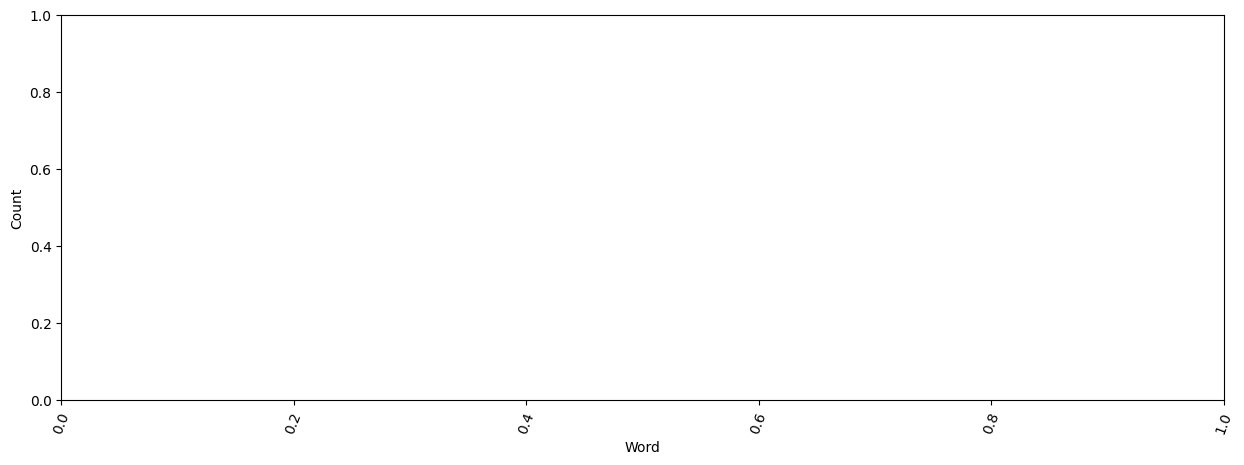

In [186]:
plot_word_frequency(corpus_without_stop, 50)

<strong>Attributes selected:</strong> Chocolate, Dark, Sweet, Bourbon, Coffee

## Task C

In [16]:
WORD = re.compile(r"\w+")

def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)

In [17]:
attr = 'chocolate dark sweet bourbon coffee'
attr_vector = text_to_vector(attr)

df_similarity = pd.DataFrame(data=[raw['Beer_Name'], raw['Review']]).T
df_similarity.columns = ['product_name', 'product_review']
df_similarity = df_similarity.drop(0)
df_similarity['similarity_score'] = df_similarity['product_review']
df_similarity['similarity_score'] = df_similarity['similarity_score'].apply(lambda r: get_cosine(attr_vector, text_to_vector(r)))

In [18]:
df_similarity.head()

,product_name,product_review,similarity_score
1,Kentucky Brunch Brand Stout,I didnt think i was going to give it a perfect...,0.035921
2,Kentucky Brunch Brand Stout,So I just read a review that called the legend...,0.019702
3,Kentucky Brunch Brand Stout,2021 vintage bottle 79\n\nHoly Fucking Shit KB...,0.110674
4,Kentucky Brunch Brand Stout,Celebrating my buddy Rug with his 1000th beer ...,0.071157
5,Kentucky Brunch Brand Stout,Thick and syrupy pour mocha head Aroma is booz...,0.063246


In [19]:
df_brandwise = df_similarity[df_similarity['similarity_score'] != 0].groupby(by='product_name').mean()
df_brandwise.head()

,similarity_score
product_name,
A Deal With The Devil - Double Oak-Aged,0.095450
A Deal With The Devil - Triple Oak-Aged,0.138721
Abner,0.023313
Abrasive Ale,0.015972
Abraxas,0.095875


In [20]:
df_similarity.to_csv('similarity_scores.csv')

## Task D

In [26]:
df_scores = pd.read_csv("similarity_scores.csv")
df_scores.head()

,Unnamed: 0,product_name,product_review,similarity_score
0,1,Kentucky Brunch Brand Stout,I didnt think i was going to give it a perfect...,0.035921
1,2,Kentucky Brunch Brand Stout,So I just read a review that called the legend...,0.019702
2,3,Kentucky Brunch Brand Stout,2021 vintage bottle 79\n\nHoly Fucking Shit KB...,0.110674
3,4,Kentucky Brunch Brand Stout,Celebrating my buddy Rug with his 1000th beer ...,0.071157
4,5,Kentucky Brunch Brand Stout,Thick and syrupy pour mocha head Aroma is booz...,0.063246


In [27]:
def windowmaker(attr, sent):
    if attr not in sent:
        return None
    attr_idx = sent.index(attr)
    i, j = attr_idx - 2, attr_idx + 2
    if i < 0:
        i = 0
    if j > len(sent):
        j = len(sent)
    return sent[i:j]

In [28]:
stop = stopwords.words('english')

def remove_stopwords(sent):
    new = []
    for w in sent:
        if w not in stop:
            new.append(w)
    return new

In [29]:
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_score(sentence):
    if not sentence:
        return None
    sentence = ' '.join(sentence)
    score = analyser.polarity_scores(sentence)
    return score['compound']

In [30]:
attrs = ['chocolate', 'dark', 'sweet', 'bourbon', 'coffee']

df_scores_filt = df_scores[df_scores['similarity_score'] != 0].copy()

for attr in attrs:
    col_name = f'{attr}_score'
    df_scores_filt[col_name] = df_scores_filt['product_review'].apply(str.lower)
    df_scores_filt[col_name] = df_scores_filt[col_name].apply(lambda r: re.sub(r'[^A-Za-z0-9 ]+', '', r))
    df_scores_filt[col_name] = df_scores_filt[col_name].apply(str.split)
    df_scores_filt[col_name] = df_scores_filt[col_name].apply(remove_stopwords)
    df_scores_filt[col_name] = df_scores_filt[col_name].apply(lambda r: windowmaker(attr, r))
    df_scores_filt[col_name] = df_scores_filt[col_name].apply(lambda r: sentiment_analyzer_score(r))

In [31]:
df_scores_filt.head()

,Unnamed: 0,product_name,product_review,similarity_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score
0,1,Kentucky Brunch Brand Stout,I didnt think i was going to give it a perfect...,0.035921,NaN,NaN,NaN,NaN,0.0000
1,2,Kentucky Brunch Brand Stout,So I just read a review that called the legend...,0.019702,NaN,0.6222,NaN,NaN,0.1779
2,3,Kentucky Brunch Brand Stout,2021 vintage bottle 79\n\nHoly Fucking Shit KB...,0.110674,0.0,NaN,NaN,0.0,0.0000
3,4,Kentucky Brunch Brand Stout,Celebrating my buddy Rug with his 1000th beer ...,0.071157,0.0,NaN,NaN,NaN,NaN
4,5,Kentucky Brunch Brand Stout,Thick and syrupy pour mocha head Aroma is booz...,0.063246,NaN,NaN,NaN,NaN,NaN


In [32]:
df_scores_filt.describe()

,Unnamed: 0,similarity_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score
count,989.000000,989.000000,496.000000,471.000000,468.000000,368.000000,347.000000
mean,1294.995956,0.114104,0.094939,0.077446,0.473938,0.112040,0.080115
std,762.544032,0.079937,0.215531,0.195770,0.210252,0.221719,0.209191
min,1.000000,0.007223,-0.557400,-0.493900,-0.471700,-0.476700,-0.526700
25%,592.000000,0.052154,0.000000,0.000000,0.458800,0.000000,0.000000
50%,1359.000000,0.093026,0.000000,0.000000,0.458800,0.000000,0.000000
75%,1982.000000,0.156293,0.000000,0.000000,0.509500,0.177900,0.000000
max,2504.000000,0.454077,0.807400,0.807400,0.859100,0.875000,0.784500


In [33]:
df_brandwise = df_scores_filt[df_scores_filt['similarity_score'] != 0].groupby(by='product_name').mean()

In [34]:
def avg(row):
    scores = [row['chocolate_score'], row['dark_score'], row['sweet_score'], row['bourbon_score'], row['coffee_score']]
    n = 0 # war crime
    avg = 0
    for s in scores:
        if np.isnan(s) or s==0:
            continue
        n += 1
        avg += s
    if n == 0:
        n += 1
    return avg / n

df_brandwise['avg_score'] = df_brandwise.apply(lambda b: avg(b), axis=1)

In [35]:
df_brandwise.head()

,Unnamed: 0,similarity_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score,avg_score
product_name,,,,,,,,
A Deal With The Devil - Double Oak-Aged,197.75,0.095450,NaN,0.000000,0.48415,0.075433,0.0000,0.279792
A Deal With The Devil - Triple Oak-Aged,177.50,0.138721,NaN,0.000000,0.45880,0.000000,NaN,0.458800
Abner,392.00,0.023313,NaN,NaN,0.45880,NaN,NaN,0.458800
Abrasive Ale,1741.00,0.015972,NaN,NaN,0.45880,NaN,NaN,0.458800
Abraxas,2393.70,0.095875,0.079629,0.069675,0.53690,0.273200,0.0602,0.203921


## Task E

In [36]:
df_brandwise['evaluation_metric'] = (df_brandwise['similarity_score'] + df_brandwise['avg_score'])/2 
df_brandwise.sort_values(by='evaluation_metric', ascending=False)

,Unnamed: 0,similarity_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score,avg_score,evaluation_metric
product_name,,,,,,,,,
Black Tuesday - Rum Barrel-Aged,2304.5,0.096538,0.0,0.0,0.796400,NaN,NaN,0.796400,0.446469
Crusher,2215.0,0.051988,NaN,NaN,0.765000,NaN,NaN,0.765000,0.408494
JJJuiceee Machine,1237.0,0.056567,NaN,0.0,0.735100,NaN,NaN,0.735100,0.395834
Doubleganger,557.0,0.054225,NaN,0.0,0.662933,NaN,NaN,0.662933,0.358579
I Will Not Be Afraid,2296.8,0.173847,0.0,0.0,0.542667,NaN,0.0,0.542667,0.358257
...,...,...,...,...,...,...,...,...,...
Lou Pepe - Framboise,753.0,0.042258,NaN,0.0,NaN,NaN,NaN,0.000000,0.021129
Schaarbeekse Kriek,2485.0,0.030643,NaN,0.0,NaN,NaN,NaN,0.000000,0.015321
Congress Street IPA,1777.0,0.026774,NaN,0.0,NaN,NaN,NaN,0.000000,0.013387


### Recommend 3 products

## Task F

In [41]:
df_scores = pd.read_csv("similarity_scores.csv")

In [42]:
nlp = en_core_web_lg.load()
scores = df_scores.copy()
scores.drop('similarity_score', axis=1, inplace=True)
doc1 = nlp(attr)
scores['spacy_score'] = scores['product_review'].apply(lambda doc2: doc1.similarity(nlp(doc2)))

/var/folders/s5/8fq8vkds1wschn5rrzxkc8br0000gn/T/ipykernel_28959/2957823665.py:5: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  scores['spacy_score'] = scores['product_review'].apply(lambda doc2: doc1.similarity(nlp(doc2)))


In [43]:
spacygroups = scores[scores['spacy_score'] != 0].groupby(by='product_name').mean()

In [44]:
def no_attrs(s):
    attrs = ['chocolate', "dark" , "sweet" , "bourbon" ,"coffee"]
    s = s.lower()
    s = re.sub(r'[^A-Za-z0-9 ]+', '', s)
    s = s.split()
    for attr in attrs:
        if attr in s:
            return True
    return False
  
def remove_stop(sent):
    new = []
    for w in sent:
        if w not in stop:
            new.append(w)
    return new

In [45]:
attrs = ['chocolate', "dark" , "sweet" , "bourbon" ,"coffee"]
spacy_filter = scores.copy()
mask = spacy_filter['product_review'].apply(no_attrs)
df_scores_spacy_filt = spacy_filter[mask]
for attr in attrs:
    col_name = f'{attr}_score'
    spacy_filter[col_name] = spacy_filter['product_review'].apply(str.lower)
    spacy_filter[col_name] = spacy_filter[col_name].apply(lambda r: re.sub(r'[^A-Za-z0-9 ]+', '', r))
    spacy_filter[col_name] = spacy_filter[col_name].apply(str.split)
    spacy_filter[col_name] = spacy_filter[col_name].apply(remove_stop)
    spacy_filter[col_name] = spacy_filter[col_name].apply(lambda r: windowmaker(attr, r))
    spacy_filter[col_name] = spacy_filter[col_name].apply(lambda r: sentiment_analyzer_score(r))

spacy_filter.describe()

,Unnamed: 0,spacy_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score
count,2513.000000,2513.000000,504.000000,486.000000,491.000000,377.000000,351.000000
mean,1257.000000,0.482850,0.093330,0.078167,0.473247,0.113060,0.080702
std,725.584936,0.113468,0.214197,0.195100,0.206961,0.221079,0.209488
min,1.000000,-0.159943,-0.557400,-0.493900,-0.471700,-0.476700,-0.526700
25%,629.000000,0.465705,0.000000,0.000000,0.458800,0.000000,0.000000
50%,1257.000000,0.514984,0.000000,0.000000,0.458800,0.000000,0.000000
75%,1885.000000,0.548490,0.000000,0.000000,0.458800,0.177900,0.000000
max,2513.000000,0.807535,0.807400,0.807400,0.875000,0.875000,0.784500


In [46]:
spacy_filter.head()

,Unnamed: 0,product_name,product_review,spacy_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score
0,1,Kentucky Brunch Brand Stout,I didnt think i was going to give it a perfect...,0.504478,NaN,NaN,NaN,NaN,0.0000
1,2,Kentucky Brunch Brand Stout,So I just read a review that called the legend...,0.489187,NaN,0.6222,NaN,NaN,0.1779
2,3,Kentucky Brunch Brand Stout,2021 vintage bottle 79\n\nHoly Fucking Shit KB...,0.563099,0.0,NaN,NaN,0.0,0.0000
3,4,Kentucky Brunch Brand Stout,Celebrating my buddy Rug with his 1000th beer ...,0.566004,0.0,NaN,NaN,NaN,NaN
4,5,Kentucky Brunch Brand Stout,Thick and syrupy pour mocha head Aroma is booz...,0.565001,NaN,NaN,NaN,NaN,NaN


In [47]:
spacy_average = spacy_filter[spacy_filter['spacy_score'] != 0].groupby(by='product_name').mean()
spacy_average.head()

,Unnamed: 0,spacy_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score
product_name,,,,,,,
4th Anniversary,975.0,0.392625,NaN,NaN,NaN,NaN,NaN
A Deal With The Devil - Double Oak-Aged,197.5,0.474971,NaN,0.0,0.48415,0.075433,0.0
A Deal With The Devil - Triple Oak-Aged,175.5,0.399525,NaN,0.0,0.45880,0.000000,NaN
Abner,395.0,0.471333,NaN,NaN,0.45880,NaN,NaN
Abrasive Ale,1745.5,0.483451,NaN,NaN,0.45880,NaN,NaN


In [48]:
spacy_average.fillna(0)

,Unnamed: 0,spacy_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score
product_name,,,,,,,
4th Anniversary,975.0,0.392625,0.00000,0.00000,0.00000,0.000000,0.00000
A Deal With The Devil - Double Oak-Aged,197.5,0.474971,0.00000,0.00000,0.48415,0.075433,0.00000
A Deal With The Devil - Triple Oak-Aged,175.5,0.399525,0.00000,0.00000,0.45880,0.000000,0.00000
Abner,395.0,0.471333,0.00000,0.00000,0.45880,0.000000,0.00000
Abrasive Ale,1745.5,0.483451,0.00000,0.00000,0.45880,0.000000,0.00000
...,...,...,...,...,...,...,...
XTRA DUBL Benthic,1792.5,0.502319,0.13935,0.27360,0.54185,0.059300,0.05744
Yellow Bus,2086.5,0.486385,0.00000,0.00000,0.00000,0.000000,0.00000
Zenne Y Frontera,120.0,0.488251,0.00000,0.19090,0.45880,0.000000,0.00000


In [49]:
spacy_average['avg_sent'] = spacy_average.apply(lambda r: avg(r), axis=1)
spacy_average.head()

,Unnamed: 0,spacy_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score,avg_sent
product_name,,,,,,,,
4th Anniversary,975.0,0.392625,NaN,NaN,NaN,NaN,NaN,0.000000
A Deal With The Devil - Double Oak-Aged,197.5,0.474971,NaN,0.0,0.48415,0.075433,0.0,0.279792
A Deal With The Devil - Triple Oak-Aged,175.5,0.399525,NaN,0.0,0.45880,0.000000,NaN,0.458800
Abner,395.0,0.471333,NaN,NaN,0.45880,NaN,NaN,0.458800
Abrasive Ale,1745.5,0.483451,NaN,NaN,0.45880,NaN,NaN,0.458800


## Task G

In [130]:
raw = pd.read_csv("Beer Reviews.csv")
raw = raw.drop(['Unnamed: 0'], axis= 1)

In [116]:
raw.head()

,Beer_Name,Rating,Review
0,Kentucky Brunch Brand Stout,None,None
1,Kentucky Brunch Brand Stout,5,I didnt think i was going to give it a perfect...
2,Kentucky Brunch Brand Stout,3.79,So I just read a review that called the legend...
3,Kentucky Brunch Brand Stout,4.64,"2021 vintage, bottle #79\n\nHoly. Fucking. Shi..."
4,Kentucky Brunch Brand Stout,4.27,"Celebrating my buddy @Rug with his 1,000th bee..."


In [131]:
raw.loc[raw["Rating"]=="None", "Rating"] = np.nan

raw = raw.dropna(subset=["Rating"])

In [135]:
raw = raw.dropna(subset=["Rating"])

In [137]:
# Changing Rating type from string to float
raw['Rating'] = raw['Rating'].astype('float')

# Getting average rating for each product
dfBrandRatings = raw.groupby(by= ['Beer_Name']).mean()

/var/folders/s5/8fq8vkds1wschn5rrzxkc8br0000gn/T/ipykernel_28959/381901768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw['Rating'] = raw['Rating'].astype('float')


In [138]:
top3Products = dfBrandRatings.sort_values(by= 'Rating', ascending= False).head(n= 3)

top3Products

,Rating
Beer_Name,
The Adjunct Trail - Bourbon Barrel-Aged,4.930000
Twice the Daily Serving: Raspberry,4.833333
Art,4.810000


## Task H

In [151]:
# Import CSV scores
df_sim_scores = pd.read_csv('similarity_scores.csv')

In [152]:
df_sim_scores # List the product name, the review for a given product and its similarity score for that product.

,Unnamed: 0,product_name,product_review,similarity_score
0,1,Kentucky Brunch Brand Stout,I didnt think i was going to give it a perfect...,0.035921
1,2,Kentucky Brunch Brand Stout,So I just read a review that called the legend...,0.019702
2,3,Kentucky Brunch Brand Stout,2021 vintage bottle 79\n\nHoly Fucking Shit KB...,0.110674
3,4,Kentucky Brunch Brand Stout,Celebrating my buddy Rug with his 1000th beer ...,0.071157
4,5,Kentucky Brunch Brand Stout,Thick and syrupy pour mocha head Aroma is booz...,0.063246
...,...,...,...,...
2508,2509,Coolship Red,Very interesting and complex ale First this is...,0.000000
2509,2510,Coolship Red,Appearance The beer was pinkish red is color ...,0.000000
2510,2511,Coolship Red,Look beautiful opaque garnet red Soft white he...,0.000000
2511,2512,Coolship Red,Caged and corked bottle dated dec32020 and ope...,0.000000


In [153]:
# Creates a new column that concatenates the string values of the product name and product review columns
df_sim_scores['name_review'] = df_sim_scores['product_name'] + " " + df_sim_scores['product_review']
df_sim_scores # Display the new table

,Unnamed: 0,product_name,product_review,similarity_score,name_review
0,1,Kentucky Brunch Brand Stout,I didnt think i was going to give it a perfect...,0.035921,Kentucky Brunch Brand Stout I didnt think i wa...
1,2,Kentucky Brunch Brand Stout,So I just read a review that called the legend...,0.019702,Kentucky Brunch Brand Stout So I just read a r...
2,3,Kentucky Brunch Brand Stout,2021 vintage bottle 79\n\nHoly Fucking Shit KB...,0.110674,Kentucky Brunch Brand Stout 2021 vintage bottl...
3,4,Kentucky Brunch Brand Stout,Celebrating my buddy Rug with his 1000th beer ...,0.071157,Kentucky Brunch Brand Stout Celebrating my bud...
4,5,Kentucky Brunch Brand Stout,Thick and syrupy pour mocha head Aroma is booz...,0.063246,Kentucky Brunch Brand Stout Thick and syrupy p...
...,...,...,...,...,...
2508,2509,Coolship Red,Very interesting and complex ale First this is...,0.000000,Coolship Red Very interesting and complex ale ...
2509,2510,Coolship Red,Appearance The beer was pinkish red is color ...,0.000000,Coolship Red Appearance The beer was pinkish ...
2510,2511,Coolship Red,Look beautiful opaque garnet red Soft white he...,0.000000,Coolship Red Look beautiful opaque garnet red ...
2511,2512,Coolship Red,Caged and corked bottle dated dec32020 and ope...,0.000000,Coolship Red Caged and corked bottle dated dec...


In [256]:
# Generate a lift table and a dataframe of the lift values
beer_attributes = ['chocolate', 'dark', 'sweet', 'bourbon'] # The attributes of interest found from our frequencies

all_beer_names = [i for i in np.unique(df_sim_scores['product_name'])] # Get a list of all unique beers
rand_beers = [all_beer_names[np.random.randint(1,249)] for i in range(0, 10, 1)] # Randomly select 10 beers 

beer_attributes_names = beer_attributes # Repackaging beer attributes as new list
for i in rand_beers: # For every beer of the randomly selected 10 beers...
    beer_attributes_names.append(i) # ...add that beer into the same list as the beer attributes

col = 'name_review' # Column that contains the product name and product review
lift_table, lift_dict_values = ra.lift_ratio(index=beer_attributes_names, data=df_sim_scores, capture_column=col) # Create the lift table and dataframe of lift values

In [201]:
len(all_beer_names)

249

In [272]:
lift_table # Display the lift table

KeyError: '`Styler.apply` and `.applymap` are not compatible with non-unique index or columns.'

In [156]:
lift_dict_values # Display the dataframe of the lift values

,chocolate,dark,sweet,bourbon,Bomb!,Rare Scooop,Heady Topper,A Deal With The Devil - Double Oak-Aged,Affogato,Keene Idea,Cable Car Kriek,Pliny The Elder,"Somewhere, Something Incredible Is Waiting To Be Known",Oude Geuze Cuvée Armand & Gaston
chocolate,NaN,15.206,5.805,18.721,2.396,7.585,0,0,1.896,0,0,0,3.364,0
dark,15.206,NaN,5.563,12.391,1.132,0,0.389,0.603,0.543,0,0,0.187,3.626,0.837
sweet,5.805,5.563,NaN,4.618,1.765,0.934,0.94,1.605,0.373,0.748,0,2.194,15.003,0.936
bourbon,18.721,12.391,4.618,NaN,1.482,0,0,3.051,0.708,0,0,0,0,0
Bomb!,2.396,1.132,1.765,1.482,NaN,0,0,0,0,0,0,0,0,0
Rare Scooop,7.585,0,0.934,0,0,NaN,0,0,0,0,0,0,0,0
Heady Topper,0,0.389,0.94,0,0,0,NaN,0,0,0,0,0,0,0
A Deal With The Devil - Double Oak-Aged,0,0.603,1.605,3.051,0,0,0,NaN,0,0,0,0,0,0
Affogato,1.896,0.543,0.373,0.708,0,0,0,0,NaN,0,0,0,0,0
Keene Idea,0,0,0.748,0,0,0,0,0,0,NaN,0,0,0,0


In [157]:
rando_beer = lift_dict_values.columns[np.random.randint(4, len(lift_dict_values))] # Select a random beer from the 10 randomly selected beers
rando_beer

'Rare Scooop'

In [158]:
lift_dict_values.columns # List the attritbutes and 10 randomly chosen beers

Index(['chocolate', 'dark', 'sweet', 'bourbon', 'Bomb!', 'Rare Scooop',
       'Heady Topper', 'A Deal With The Devil - Double Oak-Aged', 'Affogato',
       'Keene Idea', 'Cable Car Kriek', 'Pliny The Elder',
       'Somewhere, Something Incredible Is Waiting To Be Known',
       'Oude Geuze Cuvée Armand & Gaston'],
      dtype='object')

In [159]:
diff = []   # List to contain differences of summed lift values
idx = []    # List to store name of the beer
for i in lift_dict_values.columns[4:]: # For beer in list of 10 randomly selected beers...
    if i == rando_beer: # if the beer picked is our randomly selected beer
        continue # Iterate to the next beer
    # Take the difference between the chosen beer and one of the 9 remaining beers for each attribute
    series = abs(lift_dict_values[rando_beer][:4]) - abs(lift_dict_values[i][:4]) 
    # Append the sum of lift values and the name of the beer compared to the chosen beer
    val = sum(series.values) 
    diff.append(val)
    idx.append(i)


In [160]:
most_sim = pd.Series(diff, index=idx) # Create a new pandas series that contains comparison
most_sim # Display the difference scores

Bomb!                                                      1.744
Heady Topper                                               7.190
A Deal With The Devil - Double Oak-Aged                    3.260
Affogato                                                   4.999
Keene Idea                                                 7.771
Cable Car Kriek                                            8.519
Pliny The Elder                                            6.138
Somewhere, Something Incredible Is Waiting To Be Known   -13.474
Oude Geuze Cuvée Armand & Gaston                           6.746
dtype: float64